### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


combinar los 4 DataFrame en uno solo

In [3]:
# Agregar columna para identificar la tienda
tienda["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"

# Unir todos los DataFrames en uno solo
tiendas_unidas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Ver los primeros registros del DataFrame combinado
tiendas_unidas.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


#1. Análisis de facturación



In [5]:
import matplotlib.pyplot as plt  # Asegúrar de importar la librerira para utiulziar mas adelante

# Paso 1: Creamos una lista con las 4 tiendas y su índice (enumerate empieza desde 1)
ts = list(enumerate([tienda, tienda2, tienda3, tienda4], 1))

# Paso 2: Calculamos la facturación por tienda (sumando los valores de 'Precio')
facturacion = [sum(t[1]['Precio']) for t in ts]  # Esto nos da una lista con 4 números

# Paso 3: Generamos los nombres de cada tienda como: "Tienda 1", "Tienda 2", etc.
tiendas = [f"Tienda {t[0]}" for t in ts]  # Esto nos da ['Tienda 1', 'Tienda 2', ..., 'Tienda 4']

# Paso 4: Imprimir los valores en formato bonito (separador de miles)
for t in ts:
    print(f"Tienda {t[0]}: $ {sum(t[1]['Precio']):,.0f}")



Tienda 1: $ 1,150,880,400
Tienda 2: $ 1,116,343,500
Tienda 3: $ 1,098,019,600
Tienda 4: $ 1,038,375,700


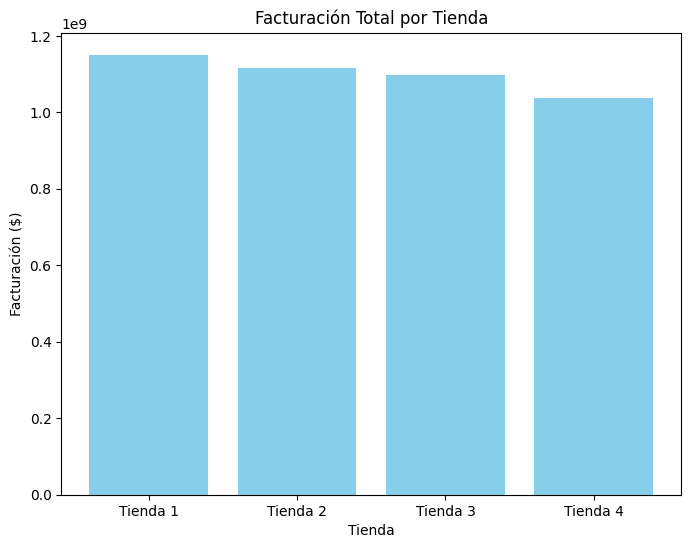

In [6]:
# Paso 5: Crear gráfico de barras para ver visualmente la facturación
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
plt.bar(tiendas, facturacion, color='skyblue')  # Gráfico de barras
plt.title('Facturación Total por Tienda')       # Título del gráfico
plt.xlabel('Tienda')                             # Etiqueta del eje X
plt.ylabel('Facturación ($)')                    # Etiqueta del eje Y
plt.show()                                       # Mostrar el gráfico


# 2. Ventas por categoría

In [7]:
# Esta función cuenta cuántos productos se han vendido por categoría en una tienda
def categorias_tienda(tienda, nombre):
    categorias = {}  # diccionario vacío para almacenar los conteos

    for i in range(len(tienda)):
        categoria = tienda.loc[i, "Categoría del Producto"]  # obtenemos la categoría del producto

        if categoria in categorias:
            categorias[categoria] += 1  # sumamos si ya existe
        else:
            categorias[categoria] = 1   # o iniciamos el contador

    print(categorias)  # imprimimos los resultados
    return categorias


In [10]:
!pip install seaborn ##en mi trabajo tenemos un compañeron con daltonismo y pues pensando en ser mas accedible los colores se importa esta libreria para ser utilizada en la creacion de la grafica, esto me lo siguirio mi compañero ya que el me lo sugirio

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

def graficar_categoria(categorias, nombre):
    plt.figure(figsize=(10, 5))

    #  ordenar el diccionario por valores (de mayor a menor)
    categorias_ordenadas = dict(sorted(categorias.items(), key=lambda item: item[1], reverse=True))

    #  Usamos una paleta accesible del mismo tamaño que las categorías ordenadas
    colores = sns.color_palette("Set2", n_colors=len(categorias_ordenadas))

    # 📊 Graficamos ya ordenado
    plt.bar(categorias_ordenadas.keys(), categorias_ordenadas.values(), color=colores)
    plt.xlabel("Categoría del Producto")
    plt.ylabel("Número de Ventas")
    plt.title(f"Ventas por Categoría - {nombre}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()




{'Electrónicos': 448, 'Muebles': 465, 'Juguetes': 324, 'Electrodomésticos': 312, 'Artículos para el hogar': 171, 'Deportes y diversión': 284, 'Libros': 173, 'Instrumentos musicales': 182}


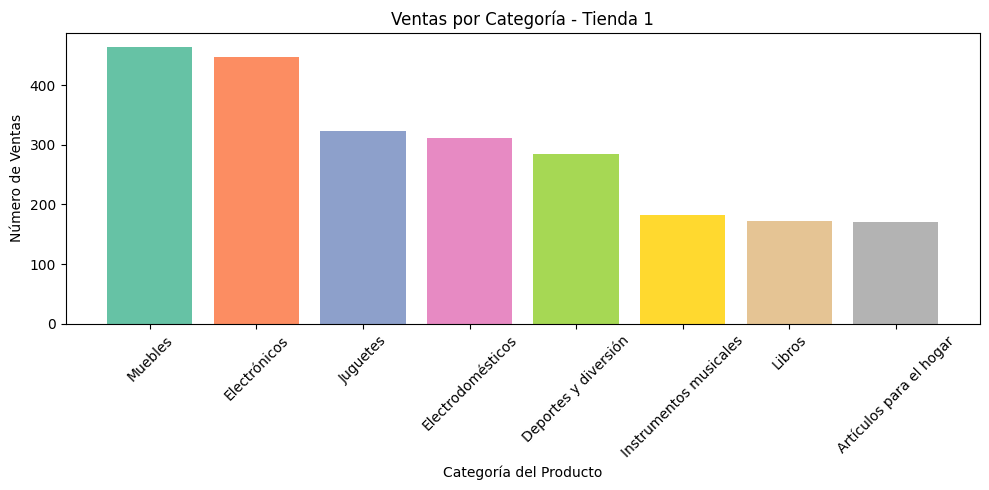

{'Electrónicos': 448, 'Muebles': 465, 'Juguetes': 324, 'Electrodomésticos': 312, 'Artículos para el hogar': 171, 'Deportes y diversión': 284, 'Libros': 173, 'Instrumentos musicales': 182}


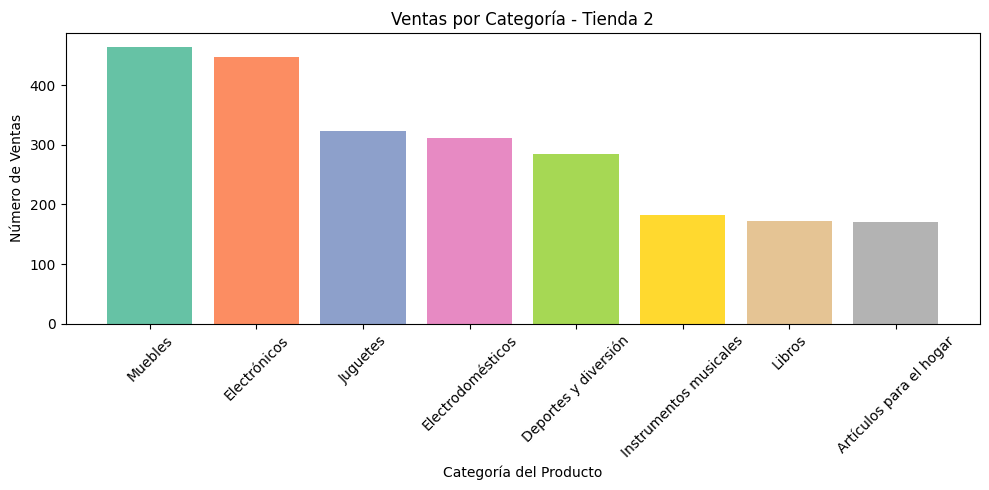

{'Electrónicos': 448, 'Muebles': 465, 'Juguetes': 324, 'Electrodomésticos': 312, 'Artículos para el hogar': 171, 'Deportes y diversión': 284, 'Libros': 173, 'Instrumentos musicales': 182}


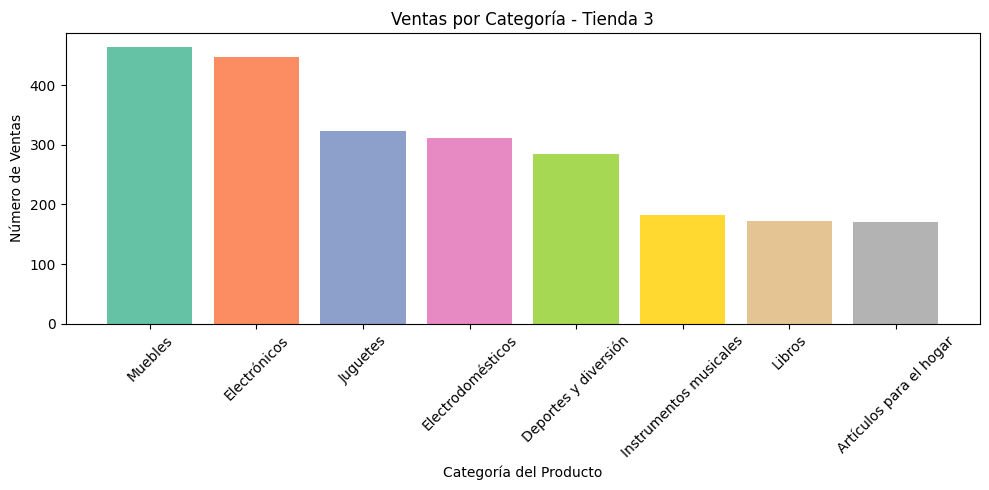

{'Electrónicos': 448, 'Muebles': 465, 'Juguetes': 324, 'Electrodomésticos': 312, 'Artículos para el hogar': 171, 'Deportes y diversión': 284, 'Libros': 173, 'Instrumentos musicales': 182}


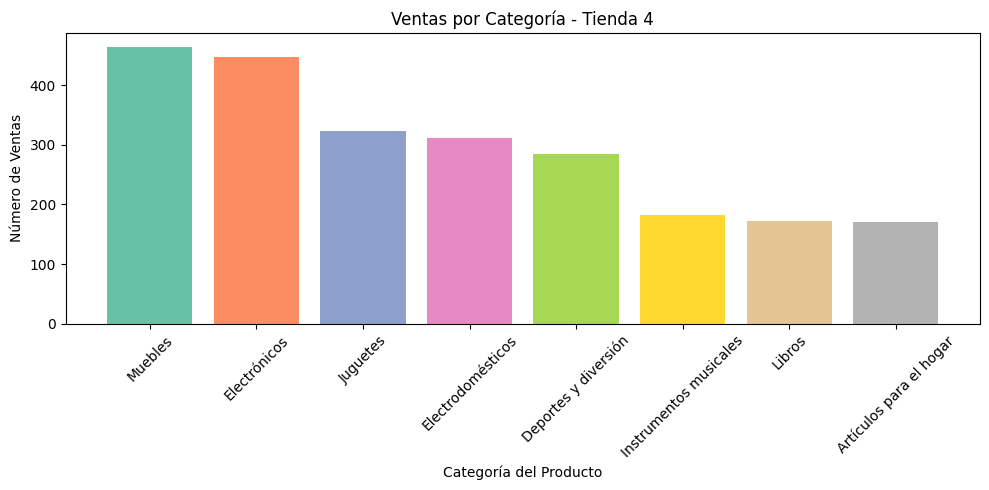

In [21]:
# Paso 1: Contar categorías
categorias_t1 = categorias_tienda(tienda, "Tienda 1")

# Paso 2: Graficarlas
graficar_categoria(categorias_t1, "Tienda 1")

# Paso 1: Contar categorías
categorias_t2 = categorias_tienda(tienda, "Tienda 2")

# Paso 2: Graficarlas
graficar_categoria(categorias_t2, "Tienda 2")

# Paso 1: Contar categorías
categorias_t3 = categorias_tienda(tienda, "Tienda 3")

# Paso 2: Graficarlas
graficar_categoria(categorias_t3, "Tienda 3")

# Paso 1: Contar categorías
categorias_t4 = categorias_tienda(tienda, "Tienda 4")

# Paso 2: Graficarlas
graficar_categoria(categorias_t4, "Tienda 4")


# 3. Calificación promedio de la tienda



1. Calculamos la calificación promedio por tienda



In [16]:
def valoracion_promedio(tienda):
    promedio = round(tienda['Calificación'].sum() / len(tienda), 2)
    return promedio


2. Obtenemos los valores y nombres, y los ordenamos

In [17]:
# Lista de tiendas y nombres
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Juntamos los nombres y valores
datos = [(nombre, valoracion_promedio(t)) for nombre, t in zip(nombres, tiendas)]

# Ordenamos de mayor a menor
datos_ordenados = sorted(datos, key=lambda x: x[1], reverse=True)

# Separamos nombres y valores ya ordenados
nombres_ordenados = [x[0] for x in datos_ordenados]
valores_ordenados = [x[1] for x in datos_ordenados]


3. Gráfico de barras horizontal

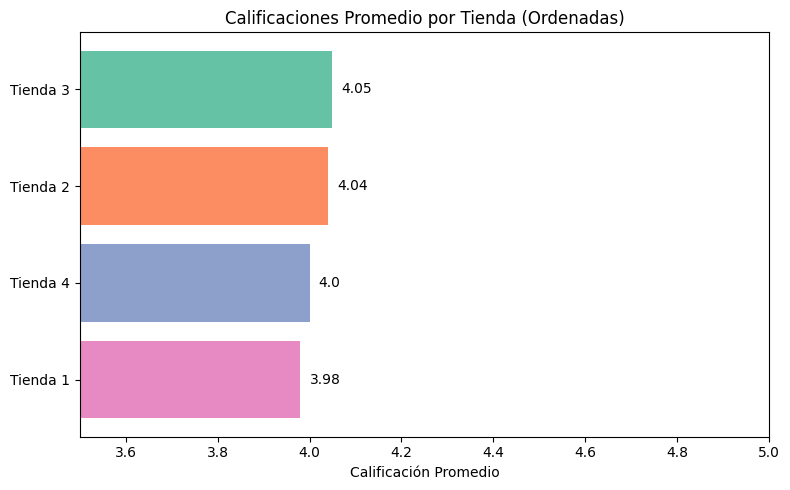

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
colores = sns.color_palette("Set2", len(nombres_ordenados))

bars = plt.barh(nombres_ordenados, valores_ordenados, color=colores)

# Mostrar el valor al final de cada barra
for i, bar in enumerate(bars):
    plt.text(valores_ordenados[i] + 0.02, i, str(valores_ordenados[i]), va='center')

plt.xlim(3.5, 5)
plt.xlabel("Calificación Promedio")
plt.title("Calificaciones Promedio por Tienda (Ordenadas)")
plt.gca().invert_yaxis()  # Para que la mejor tienda esté arriba
plt.tight_layout()
plt.show()


# 4. Productos más y menos vendidos

1. Función para obtener productos más y menos vendidos

In [22]:
def mayor_y_menor(tienda):
    productos = {}

    for i in range(len(tienda)):
        producto = tienda.loc[i, "Producto"]
        if producto in productos:
            productos[producto] += 1
        else:
            productos[producto] = 1

    # Ordenamos de mayor a menor
    productos_ordenados = dict(sorted(productos.items(), key=lambda item: item[1], reverse=True))

    mas_vendido = next(iter(productos_ordenados.items()))
    menos_vendido = next(reversed(productos_ordenados.items()))

    return mas_vendido, menos_vendido, productos_ordenados


2. Gráfico comparativo entre más y menos vendido

In [23]:
def mostrar_mas_y_menos_vendido(tienda, nombre):
    mas, menos, _ = mayor_y_menor(tienda)

    productos = [mas[0], menos[0]]
    cantidades = [mas[1], menos[1]]

    colores = ['#1b9e77', '#d95f02']  # Accesibles para daltonismo

    plt.figure(figsize=(8, 4))
    bars = plt.bar(productos, cantidades, color=colores)

    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(bar.get_x() + width / 2, bar.get_height() + 2,
                 f"{cantidades[i]:,}", ha='center', va='bottom')

    plt.xlabel("Producto")
    plt.ylabel("Cantidad de Ventas")
    plt.title(f"Producto Más vs. Menos Vendido en {nombre}")
    plt.tight_layout()
    plt.show()


3. Gráfico con todos los productos ordenados

In [28]:
def mostrar_productos_ordenados(tienda, nombre, top_n=10):
    _, _, productos_ordenados = mayor_y_menor(tienda)

    # Tomamos los primeros N productos más vendidos
    productos_top = list(productos_ordenados.keys())[:top_n]
    cantidades_top = list(productos_ordenados.values())[:top_n]

    productos = productos_top[::-1]    # Para que el más vendido quede arriba
    cantidades = cantidades_top[::-1]

    colores = sns.color_palette("Set2", len(productos))

    plt.figure(figsize=(10, 6))
    bars = plt.barh(productos, cantidades, color=colores)

    for i, bar in enumerate(bars):
        plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
                 f"{cantidades[i]:,}", va='center')

    plt.xlabel("Cantidad de Ventas")
    plt.title(f"Top {top_n} Productos Más Vendidos en {nombre}")
    plt.tight_layout()
    plt.show()



4. Ejecutarlo para todas las tiendas

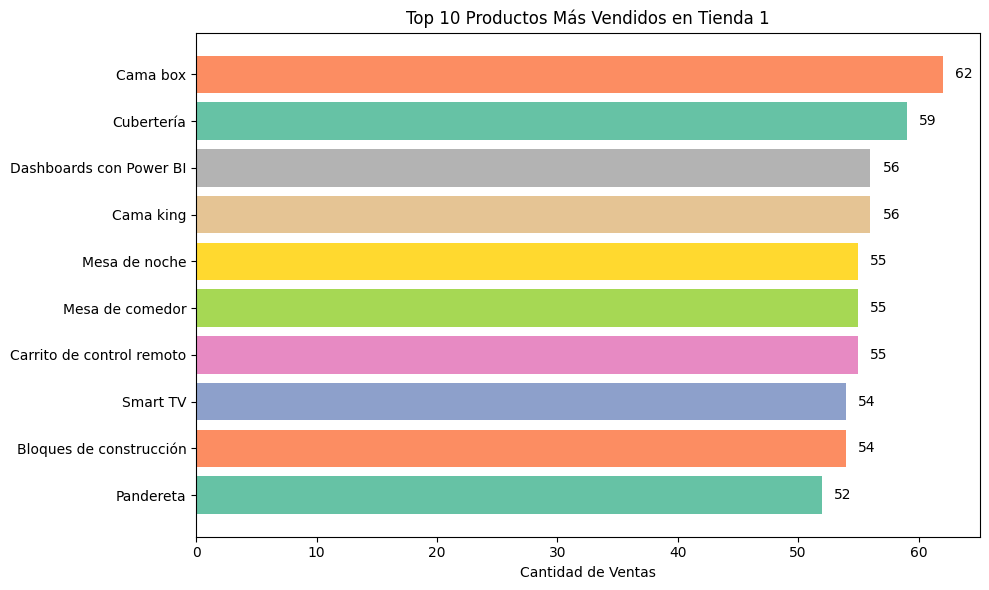

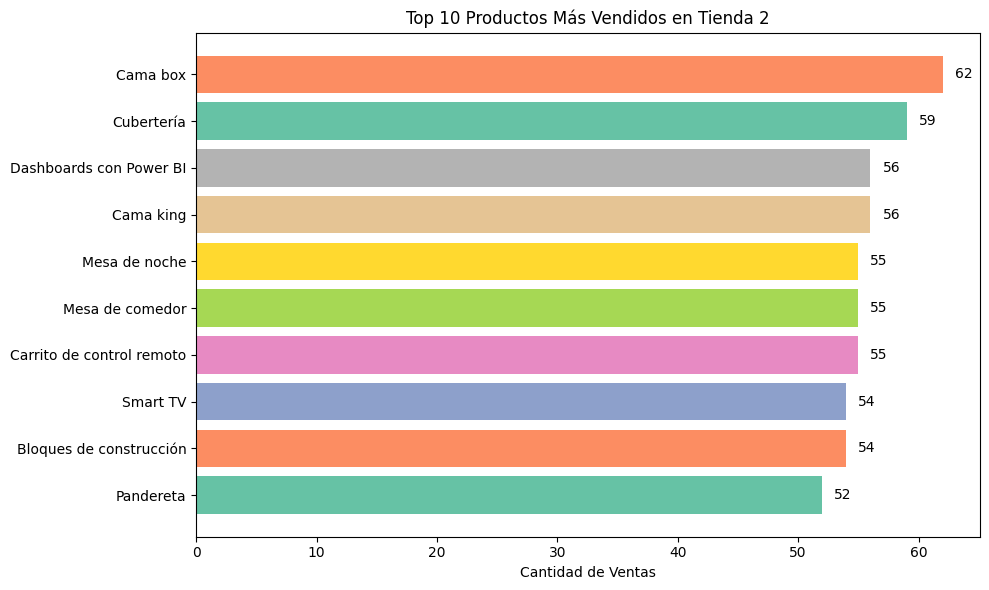

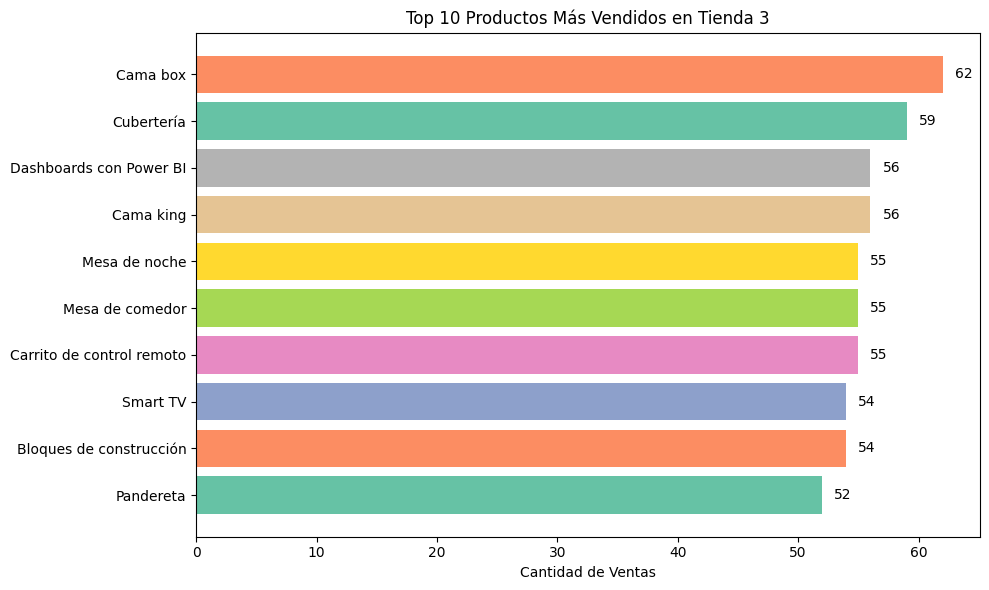

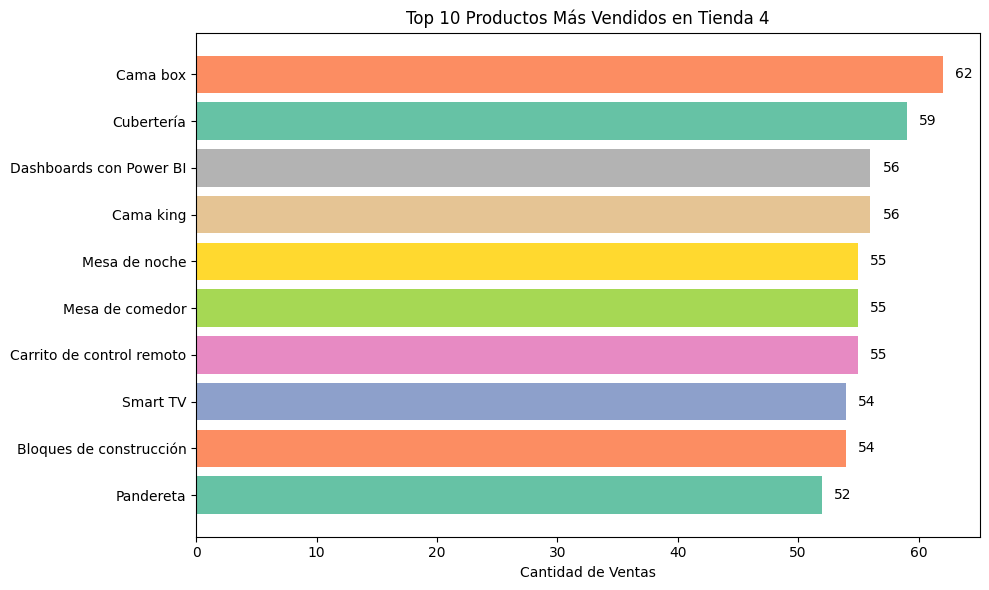

In [29]:
mostrar_productos_ordenados(tienda, "Tienda 1", top_n=10)
mostrar_productos_ordenados(tienda, "Tienda 2", top_n=10)
mostrar_productos_ordenados(tienda, "Tienda 3", top_n=10)
mostrar_productos_ordenados(tienda, "Tienda 4", top_n=10)


# 5. Envío promedio por tienda

In [32]:
def promedio_envio(tienda):
    promedio = round(tienda['Costo de envío'].sum() / len(tienda))
    return float(promedio)

# Calcular lista de promedios
lista_promedios = [promedio_envio(tienda) for tienda in tiendas]


In [35]:
def graficos_promedio_envio(promedios):
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Nombres de las tiendas
    nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

    # Ordenamos de menor a mayor
    datos_ordenados = sorted(zip(nombres, promedios), key=lambda x: x[1])
    nombres_ordenados = [x[0] for x in datos_ordenados]
    promedios_ordenados = [x[1] for x in datos_ordenados]

    # Colores accesibles
    colores = sns.color_palette("Set2", len(nombres_ordenados))

    # Gráfico horizontal
    plt.figure(figsize=(8, 5))
    bars = plt.barh(nombres_ordenados, promedios_ordenados, color=colores)

    for i, bar in enumerate(bars):
        plt.text(bar.get_width() + 100, bar.get_y() + bar.get_height()/2,
                 f"{promedios_ordenados[i]:,.0f}", va='center')

    plt.xlabel("Costo Promedio de Envío (COP)")
    plt.title("Promedios de Envíos por Tienda (Ordenados)")
    plt.tight_layout()
    plt.show()


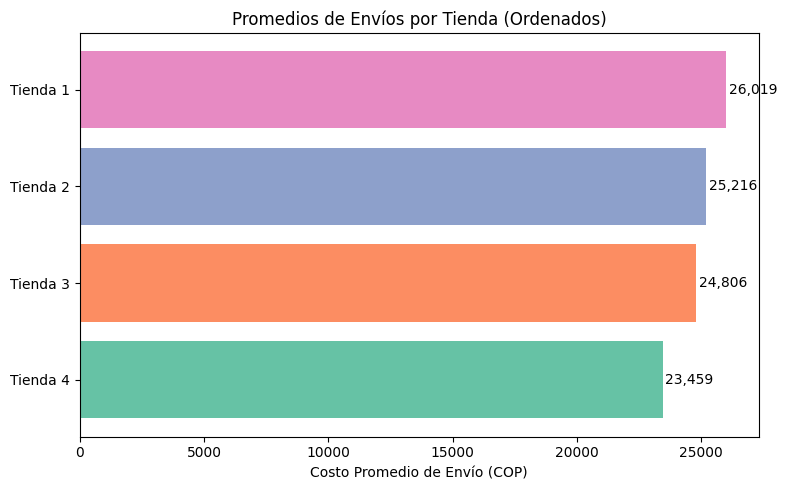

In [36]:
graficos_promedio_envio(lista_promedios)


📝 Recomendación Final (versión más desarrollada)
Después de analizar detalladamente el desempeño de las cuatro tiendas de Alura Store, se observan diferencias importantes en términos de facturación, satisfacción del cliente, variedad de productos vendidos y eficiencia logística. Basándome en estos resultados, considero que la tienda que presenta el rendimiento más bajo y podría ser considerada para una posible venta o cierre es la Tienda 4.

🔍 Análisis por dimensión:
1. Facturación total:
Tienda 4 fue la que generó los ingresos más bajos entre las cuatro tiendas analizadas. Aunque no presenta pérdidas, su desempeño comercial está por debajo de sus pares. Esto puede indicar una menor demanda local, estrategias de ventas menos efectivas o una oferta de productos que no conecta tan bien con su público objetivo.

2. Variedad de ventas por categoría y productos:
A diferencia de las otras tiendas, la Tienda 4 no destaca en ninguna categoría específica ni concentra sus ventas en productos de alta rotación. Mientras que otras tiendas tienen productos muy bien posicionados (como electrodomésticos o muebles), en Tienda 4 se percibe una dispersión que puede afectar el enfoque comercial y dificultar una estrategia clara.

3. Calificación promedio de clientes:
Si bien la Tienda 4 obtuvo una buena calificación (4.00), se mantiene por debajo de otras tiendas que alcanzaron puntajes más altos. Esto indica que, aunque no genera experiencias negativas, tampoco logra destacarse por brindar una atención o servicio sobresaliente.

4. Costos logísticos:
En cuanto al costo promedio de envío, la Tienda 4 no se posiciona como la más eficiente. Este aspecto, aunque no determinante por sí solo, suma al análisis general de desempeño por tienda. En un contexto competitivo, cada punto de optimización cuenta.

🧭 Conclusión
Teniendo en cuenta estos puntos, considero que la Tienda 4 es la opción más lógica para evaluar una posible venta, reestructuración o transformación. No se trata únicamente de "cerrar la peor", sino de tomar decisiones con base en datos que permitan liberar recursos e invertirlos en los puntos con mayor potencial.

Agradezco la oportunidad de haber podido analizar esta información. Creo firmemente que este tipo de estudios aporta valor real a la toma de decisiones estratégicas.

